# LSB Introduction 
LSB demo with my images by JunMing and his cat.


Đầu tiên khai báo các thư viện cần dùng và tải lên ảnh

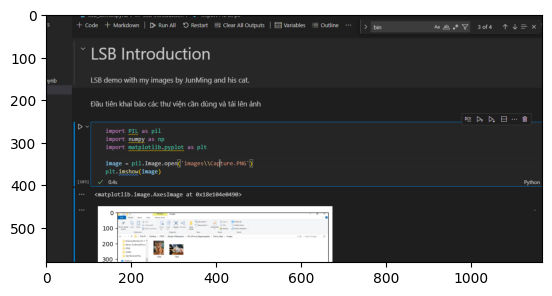

In [1]:
import PIL as pil
import numpy as np
import matplotlib.pyplot as plt

image = pil.Image.open('images\\Capture2.PNG')
plt.imshow(image)

Khi biến cell thành Numpy Array ta thấy mỗi cell có 3 giá trị là RGB.

In [2]:
np_img = np.array(image)
img_width, img_height, rgb = np_img.shape
np_img, img_width, img_height, rgb

(array([[[ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255]],
 
        [[ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255]],
 
        [[ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255]],
 
        ...,
 
        [[ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255]],
 
        [[ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
    

Tạo 2 hàm txt_to_bits để chuyển file text thành bits và hàm còn lại thì đảo ngược hàm trên, xuất ra file txt

In [3]:
def txt_to_bits(path):
    with open(path, 'r', encoding='utf-8') as file:
        message = file.read()
    message = message + "\0\0"
    message_bytes = message.encode('utf-8')
    message_bits = ''.join(format(byte, '08b') for byte in message_bytes)
    
    return message_bits

def bits_to_txt(message_bits, path='decoded.txt'):
    
    message_bytes = bytearray(int(message_bits[i:i+8], 2) for i in range(0, len(message_bits), 8)) 
    message = message_bytes.decode('utf-8')

    with open(path, 'w', encoding='utf-8') as file:
        file.write(message)

path = 'test_message.txt'
bits_to_txt(txt_to_bits(path))

with open('decoded.txt', 'r', encoding='utf-8') as file:
    file_mess = file.read()

print(file_mess)


Nghìn buổi sáng, bình minh xe chỉ thắm
Đem lòng tôi ràng rịt với xuân tươi.
Thuở xưa kia là con của mặt trời,
Tôi có lửa ở trong mình nắng đọng.  


Sau đó bắt đầu nhúng bit vào ảnh

(array([[[ 36,  37,  38, 254],
         [ 37,  37,  39, 254],
         [ 36,  37,  39, 254],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255]],
 
        [[ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255]],
 
        [[ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255]],
 
        ...,
 
        [[ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255]],
 
        [[ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         [ 37,  37,  38, 255],
         ...,
         [ 30,  30,  30, 255],
         [ 30,  30,  30, 255],
    

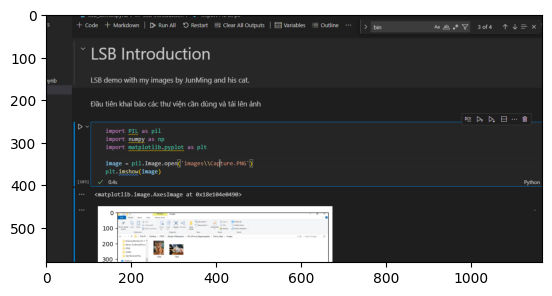

In [4]:
message_bits = txt_to_bits(path)
np_img = np_img.flatten()

for idx, bit in enumerate(message_bits):
    val = bin(np_img[idx])[2:].zfill(8)
    val = val[:-1] + bit
    np_img[idx] = int(val,2)

np_img = np_img.reshape(img_width,img_height,rgb)
np_img, plt.imshow(np_img)

In [5]:
763*1366*4

4169032

In [6]:
np_img = np_img.flatten()

secret_bits = ''
idx = 0

while secret_bits[-8:] != '00000000':  
    if idx >= len(np_img):
        break  
    val = bin(np_img[idx])[2:].zfill(8)  
    secret_bits = secret_bits + val[-1]  
    idx = idx + 1
    if idx >= len(np_img):
        break  

secret_bits = secret_bits[:-8] #Clear the /0/0 signature bits  

bits_to_txt(secret_bits,'decoded.txt')

with open('decoded.txt', 'r', encoding='utf-8') as file:
    file_mess = file.read()

print(file_mess)


Nghìn buổi sáng, bình minh xe chỉ thắm
Đem lòng tôi ràng rịt với xuân tươi.
Thuở xưa kia là con của mặt trời,
Tôi có lửa ở trong mình nắng đọng


In [8]:
print(secret_bits)
print(message_bits)

0100111001100111011010001100001110101100011011100010000001100010011101011110000110111011100101010110100100100000011100111100001110100001011011100110011100101100001000000110001011000011101011000110111001101000001000000110110101101001011011100110100000100000011110000110010100100000011000110110100011100001101110111000100100100000011101000110100011100001101110101010111101101101000010101100010010010000011001010110110100100000011011001100001110110010011011100110011100100000011101001100001110110100011010010010000001110010110000111010000001101110011001110010000001110010111000011011101110001011011101000010000001110110111000011011101110011011011010010010000001111000011101011100001110100010011011100010000001110100110001101011000011000110101000010110100100101110000010100101010001101000011101011110000110111011100111110010000001111000110001101011000001100001001000000110101101101001011000010010000001101100110000111010000000100000011000110110111101101110001000000110001111100001101110111010011101100001